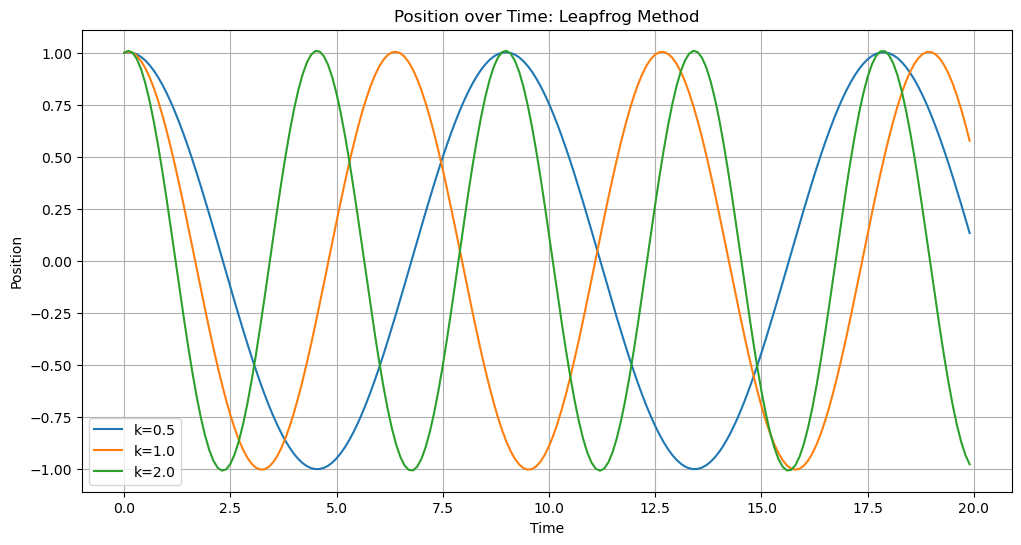

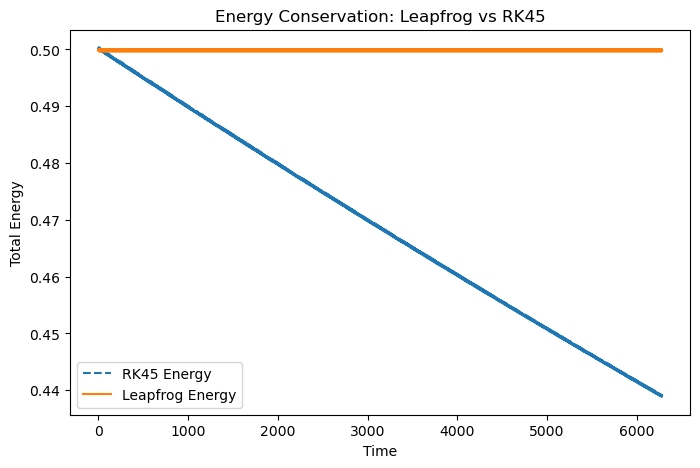

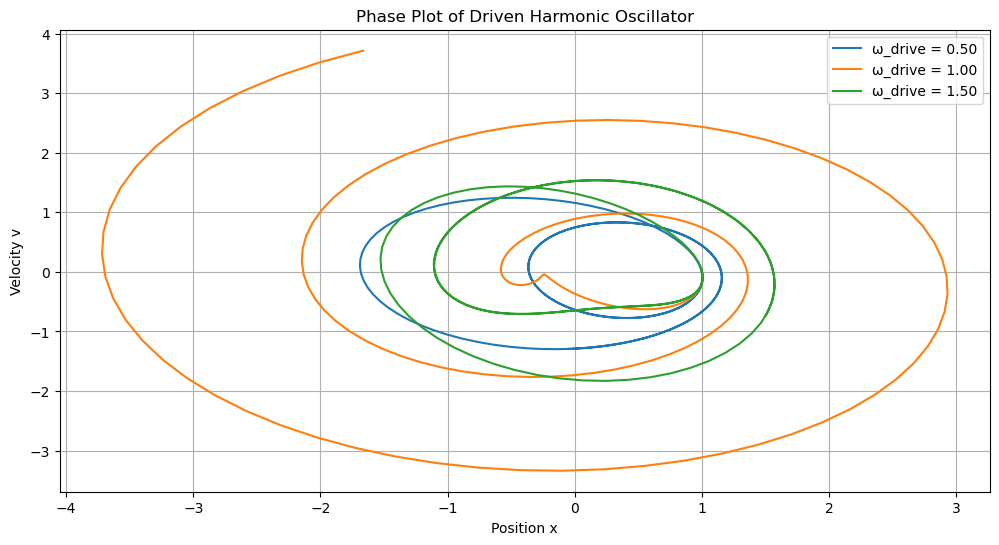

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from src.Functions_3_3 import leapfrog_oscillator, leapfrog_energy, harmonic_oscillator

if not os.path.exists("fig"):
    os.makedirs("fig")

# parameters
x0, v0, m, dt, t_max = 1.0, 0.0, 1.0, 0.1, 20
k_values = [0.5, 1.0, 2.0]

# position plots
plt.figure(figsize=(12, 6))
for k in k_values:
    t_lf, x_lf, _ = leapfrog_oscillator(x0, v0, k, m, dt, t_max)
    plt.plot(t_lf, x_lf, label=f'k={k}')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Position over Time: Leapfrog Method')
plt.legend()
plt.grid()
plt.savefig("fig/position_vs_time.png") 
plt.show()

# conservation of energy comparison
k = 1.0
omega = np.sqrt(k/m)
T = 2 * np.pi / omega
T_max = 1000 * T
t_eval = np.linspace(0, T_max, 5000)
sol = solve_ivp(harmonic_oscillator, [0, T_max], [x0, v0], t_eval=t_eval, args=(k, m, 0, 0), method='RK45')
E_rk = 0.5 * m * sol.y[1]**2 + 0.5 * k * sol.y[0]**2

t_lf, _, E_lf = leapfrog_energy(x0, v0, k, m, dt=0.05, t_max=T_max)

plt.figure(figsize=(8,5))
plt.plot(t_eval, E_rk, label='RK45 Energy', linestyle='dashed')
plt.plot(t_lf, E_lf, label='Leapfrog Energy', linestyle='solid')
plt.xlabel('Time')
plt.ylabel('Total Energy')
plt.legend()
plt.title('Energy Conservation: Leapfrog vs RK45')
plt.savefig("fig/energy_comparison.png") 
plt.show()

# forced oscillator
F0 = 0.5
omega_natural = np.sqrt(k/m)
omega_drives = [0.5 * omega_natural, omega_natural, 1.5 * omega_natural]

plt.figure(figsize=(12, 6))
for omega_drive in omega_drives:
    t_lf, x_lf, v_lf = leapfrog_oscillator(x0, v0, k, m, dt, t_max, F0, omega_drive)
    plt.plot(x_lf, v_lf, label=f'ω_drive = {omega_drive:.2f}')
plt.xlabel('Position x')
plt.ylabel('Velocity v')
plt.title('Phase Plot of Driven Harmonic Oscillator')
plt.legend()
plt.grid()
plt.savefig("fig/phase_plot.png")  
plt.show()
